# Breast Cancer Dataset Project by David Smolinski
What this adds to my portfolio:
- data analysis
- statistics with python (without machine learning) in my portfolio
- a higher order function

Links:
- [my portfolio](https://github.com/DavidSmolinski/portfolio)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)
- [the csv](https://github.com/DavidSmolinski/portfolio)

In [38]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('dataR2.csv', delimiter=',')
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Classification': 'has_cancer'})

cols = df.columns.values.tolist()


def healthy_cancer(col, df=df, healthy=1, has_cancer=2):
    """
    :param df: dataframe
    :param col: string, the df column other than has_cancer
    :return: a list of 2 df series (cancer - and +)
    """
    return [df.loc[df.has_cancer == healthy, col], df.loc[df.has_cancer == has_cancer, col]]


def cancer_hist(col):
    """a histogram for cancer + and - for col
    :param col: string, the df column other than has_cancer
    """
    healthy, cancer = healthy_cancer(col)
    plt.hist(healthy, alpha=.5, bins=9, label='healthy')
    plt.hist(cancer, alpha=.5, bins=9, label='cancer')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('people')
    plt.title(f'{col} and cancer')
    filename = f'{col} and cancer'
    return plt, filename


def box_plot(col):
    """cancer + and - box plots for col
    :param col: string, the df column other than has_cancer
    """
    plt.boxplot(healthy_cancer(col), showfliers=True,
                widths=.9)
    plt.xticks([1, 2], ['healthy', 'cancer patient'])
    plt.title(f'Cancer vs {col}')
    plt.ylabel(col)
    filename = f'Cancer vs {col} Box Plot'
    return plt, filename


def one_box_plot_for_all_vars(cols=cols[0:-1]):
    """Print one fig with cancer + and - box plots for each var"""
    loc_lists2 = []
    xticks_list = []
    for col in cols:
        loc_lists = healthy_cancer(col)
        loc_lists2 += loc_lists
        xticks_list += [f'{col}-', f'{col}+']

    plt.boxplot(loc_lists2, showfliers=False, widths=.9)
    plt.title('Box Plots For All Cancer Variables')
    plt.xlabel('variable, "+" means cancer')
    plt.xticks(list(range(1, len(xticks_list) + 1)), xticks_list, rotation='vertical')
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.show()
    plt.clf()


def describe_cols(columns):
    """prints pandas describe() for cancer + and - for var
    :param columns: a list of dataframe column names other than has_cancer
    """
    for col in columns:
        healthy, cancer = healthy_cancer(col)
        print(f'\n{col} cancer+\n{cancer.describe()}')
        print(f'\n{col} cancer-\n{healthy.describe()}')


def loop_plots(func, columns, show_not_save=True):
    for col in columns:
        plot, filename = func(col)
        if show_not_save is True:
            plot.show()
        else:
            plot.savefig(filename + '.png')
        plot.clf()

In [39]:
df.head(1)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,has_cancer
0,48,23.5,70,2.707,0.467409,8.8071,9.7024,7.99585,417.114,1


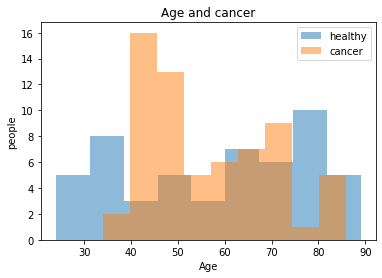

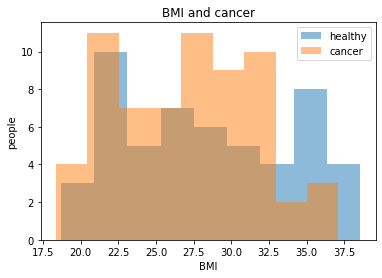

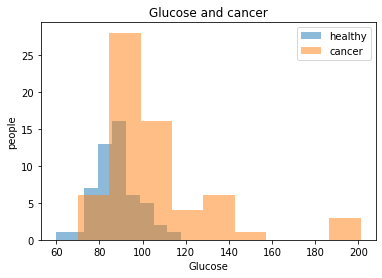

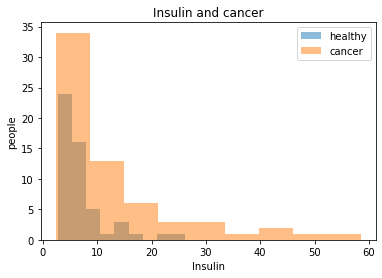

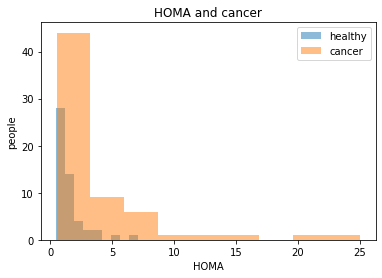

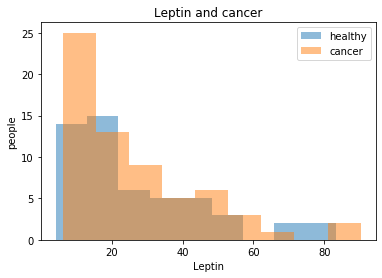

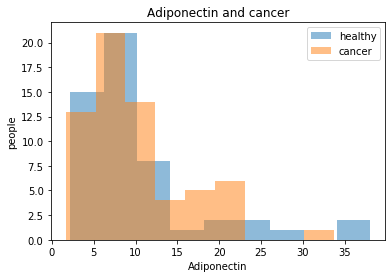

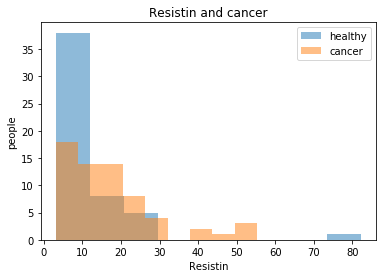

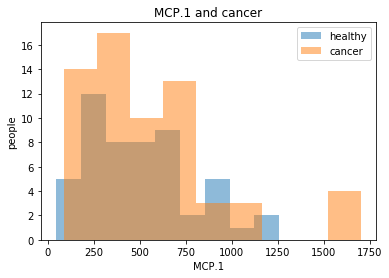

<Figure size 432x288 with 0 Axes>

In [40]:
loop_plots(func=cancer_hist, columns=cols[0:-1], show_not_save=True)

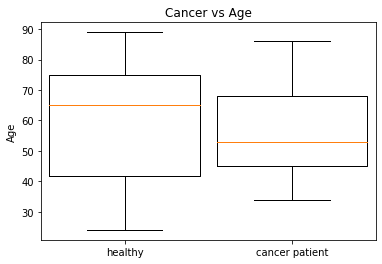

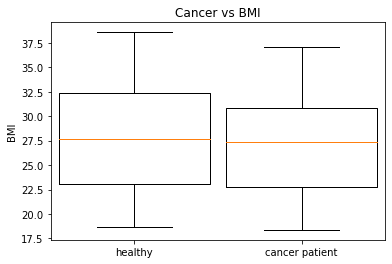

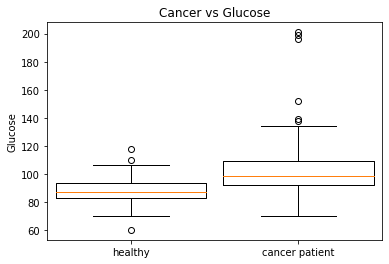

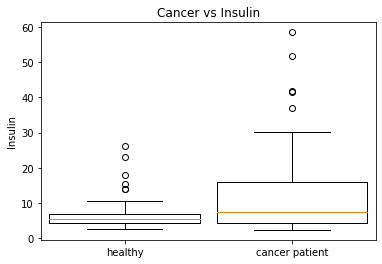

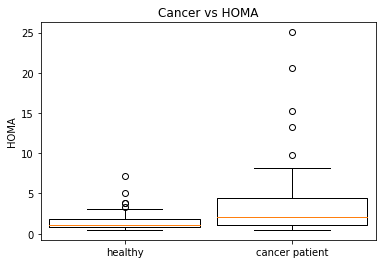

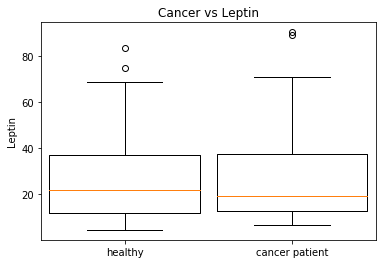

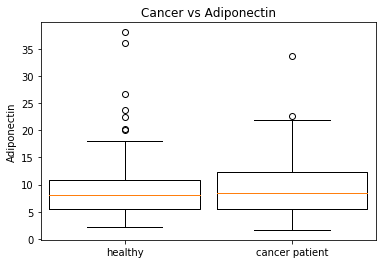

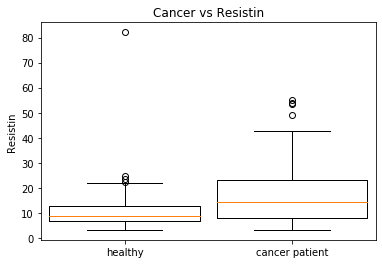

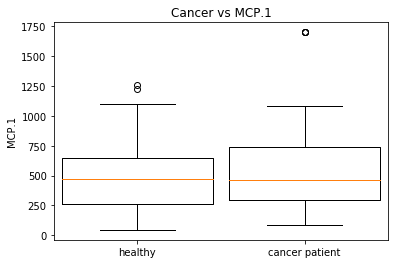

<Figure size 432x288 with 0 Axes>

In [41]:
loop_plots(func=box_plot, columns=cols[0:-1])

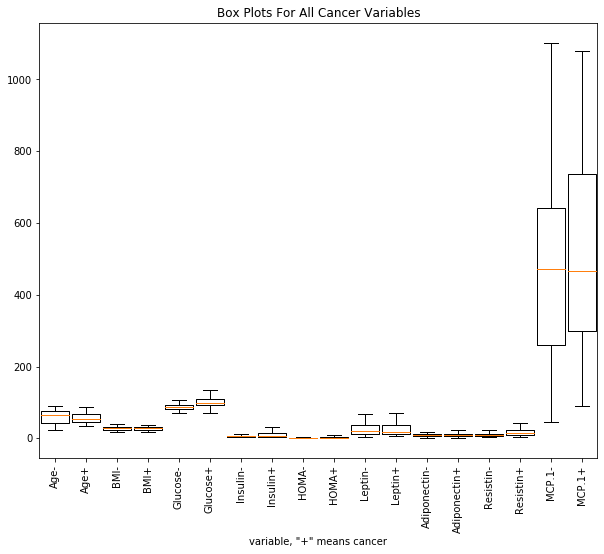

<Figure size 432x288 with 0 Axes>

In [42]:
one_box_plot_for_all_vars()

In [43]:
describe_cols(columns=cols[0:-1])


Age cancer+
count    64.000000
mean     56.671875
std      13.493155
min      34.000000
25%      45.000000
50%      53.000000
75%      68.000000
max      86.000000
Name: Age, dtype: float64

Age cancer-
count    52.000000
mean     58.076923
std      18.957999
min      24.000000
25%      41.750000
50%      65.000000
75%      75.000000
max      89.000000
Name: Age, dtype: float64

BMI cancer+
count    64.000000
mean     26.984740
std       4.620398
min      18.370000
25%      22.788722
50%      27.408027
75%      30.810069
max      37.109375
Name: BMI, dtype: float64

BMI cancer-
count    52.000000
mean     28.317336
std       5.427465
min      18.670000
25%      23.096003
50%      27.694389
75%      32.328091
max      38.578759
Name: BMI, dtype: float64

Glucose cancer+
count     64.00000
mean     105.56250
std       26.55744
min       70.00000
25%       92.00000
50%       98.50000
75%      109.00000
max      201.00000
Name: Glucose, dtype: float64

Glucose cancer-
count     52.000000


In [44]:
threshold = 120
healthy=1
has_cancer=2
threshold_ratio = df.loc[(df.has_cancer == has_cancer) & (df.Glucose > threshold), 'Glucose'].sum() \
                  / healthy_cancer('Glucose')[1].sum()
print(f'\nThe glucose threshold of > {threshold} mg/dL captures {threshold_ratio * 100}% of cancer +.')


The glucose threshold of > 120 mg/dL captures 24.911190053285967% of cancer +.


## Analysis:

### What the box plots suggest:
1. Leptin and adiponectin are weaker cancer indicators.
2. For all of these biomarkers (except Leptin), a higher concentration correlates with cancer.
3. None of these predictors are very strong.

### What 2 of the histograms suggest:

#### Age and cancer:
1. Both distributions are bimodal.
2. Cancer testing might not make sense if age is <30 or >90.
3. The age when cancer is most probable lies between 40 and 50.

#### Glucose and cancer:
1. Both distributions are unimodal left skewed.
2. A threshold of > 120 mg/dL would give high specificity and fair sensitivity (getting 25% of cancer+ and almost no false positives). 


dataset citations:

Miguel Patrício(miguelpatricio '@' gmail.com), José Pereira (jafcpereira '@' gmail.com), Joana Crisóstomo (joanacrisostomo '@' hotmail.com), Paulo Matafome (paulomatafome '@' gmail.com), Raquel Seiça (rmfseica '@' gmail.com), Francisco Caramelo (fcaramelo '@' fmed.uc.pt), all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes (manuelmgomes '@' gmail.com) from the University Hospital Centre of Coimbra